# Earthquakes.ipynb   土耳其地震数据分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('../data/Earthquakes.csv', 
                   usecols=['Date(UTC)', 'Latitude', 'Longitude', 'Depth', 'Magnitude'])
data.head()

,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2018-10-14 15:08:32,36.8578,44.4161,16.97,4.0
1,2018-10-10 09:08:24,37.4341,35.8520,7.02,4.1
2,2018-10-02 15:29:03,37.6878,37.4016,10.27,4.4
3,2018-09-28 00:26:32,37.2003,30.4376,78.07,4.0
4,2018-09-26 02:52:21,35.6846,26.7266,42.77,4.5


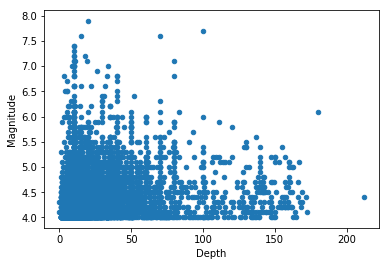

In [32]:
data.plot.scatter(x='Depth', y='Magnitude')

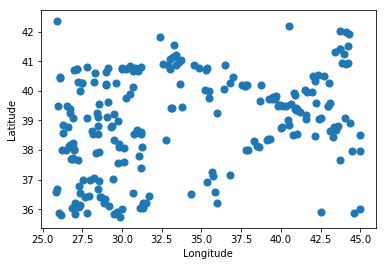

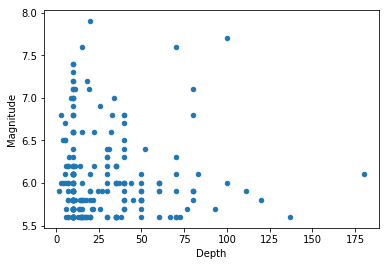

In [33]:
mask = data['Magnitude'] > 5.5
data = data[mask]
data.plot.scatter(x='Longitude', y='Latitude', s=50)

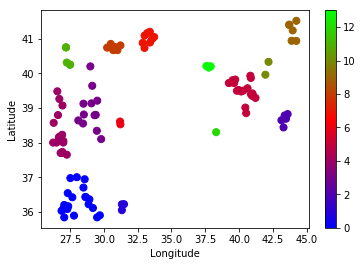

In [29]:
# 训练DBSCAN模型，找到地震高发区
import sklearn.cluster as sc
import sklearn.metrics as sm

train_data = data[['Longitude', 'Latitude']]
eps = np.arange(0.2, 2.0, 0.1)
for epsilon in eps:
    model = sc.DBSCAN(eps=epsilon, min_samples=5)
    model.fit(train_data)
    labels = model.labels_
    score = sm.silhouette_score(train_data, labels, sample_size=len(data), metric='euclidean')
    # print(epsilon, score)

model = sc.DBSCAN(eps=0.6, min_samples=5)
model.fit(train_data)
labels = model.labels_

mask = model.core_sample_indices_
train_data = train_data.iloc[mask]
labels = labels[mask]
train_data.plot.scatter(x='Longitude', y='Latitude', s=50, c=labels, cmap='brg')
